# Cardiovascular Diseases Prediction using Machine Learning

### Workflow of model

  - Data collection
  - Data Visualization
  - Splitting the Features and Target
  - Train-Test split
  - Model Training
  - Model Evaluation
  - Predicting Results
  - Saving Model


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



# for model improvement
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

## Data Collection and Processing

In [2]:
# loading data into pandas data frame

data = pd.read_csv("cardio.csv")
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
# columns name
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# shape of dataset

data.shape

(1025, 14)

In [5]:
# describing data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# checking for missing values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# checking the distribution of target variable
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

## Data Visualization

<Axes: xlabel='target', ylabel='count'>

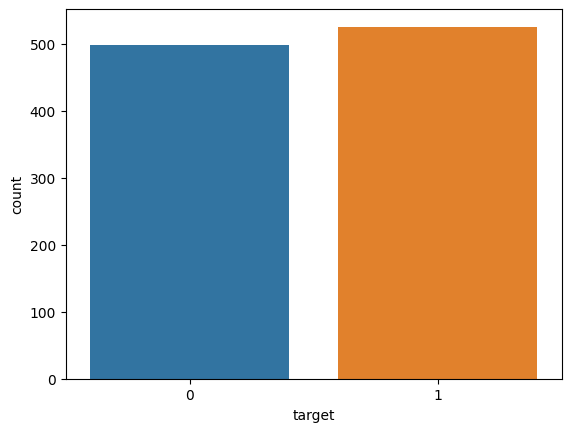

In [51]:
sns.countplot(x=data["target"])

# distribution of target

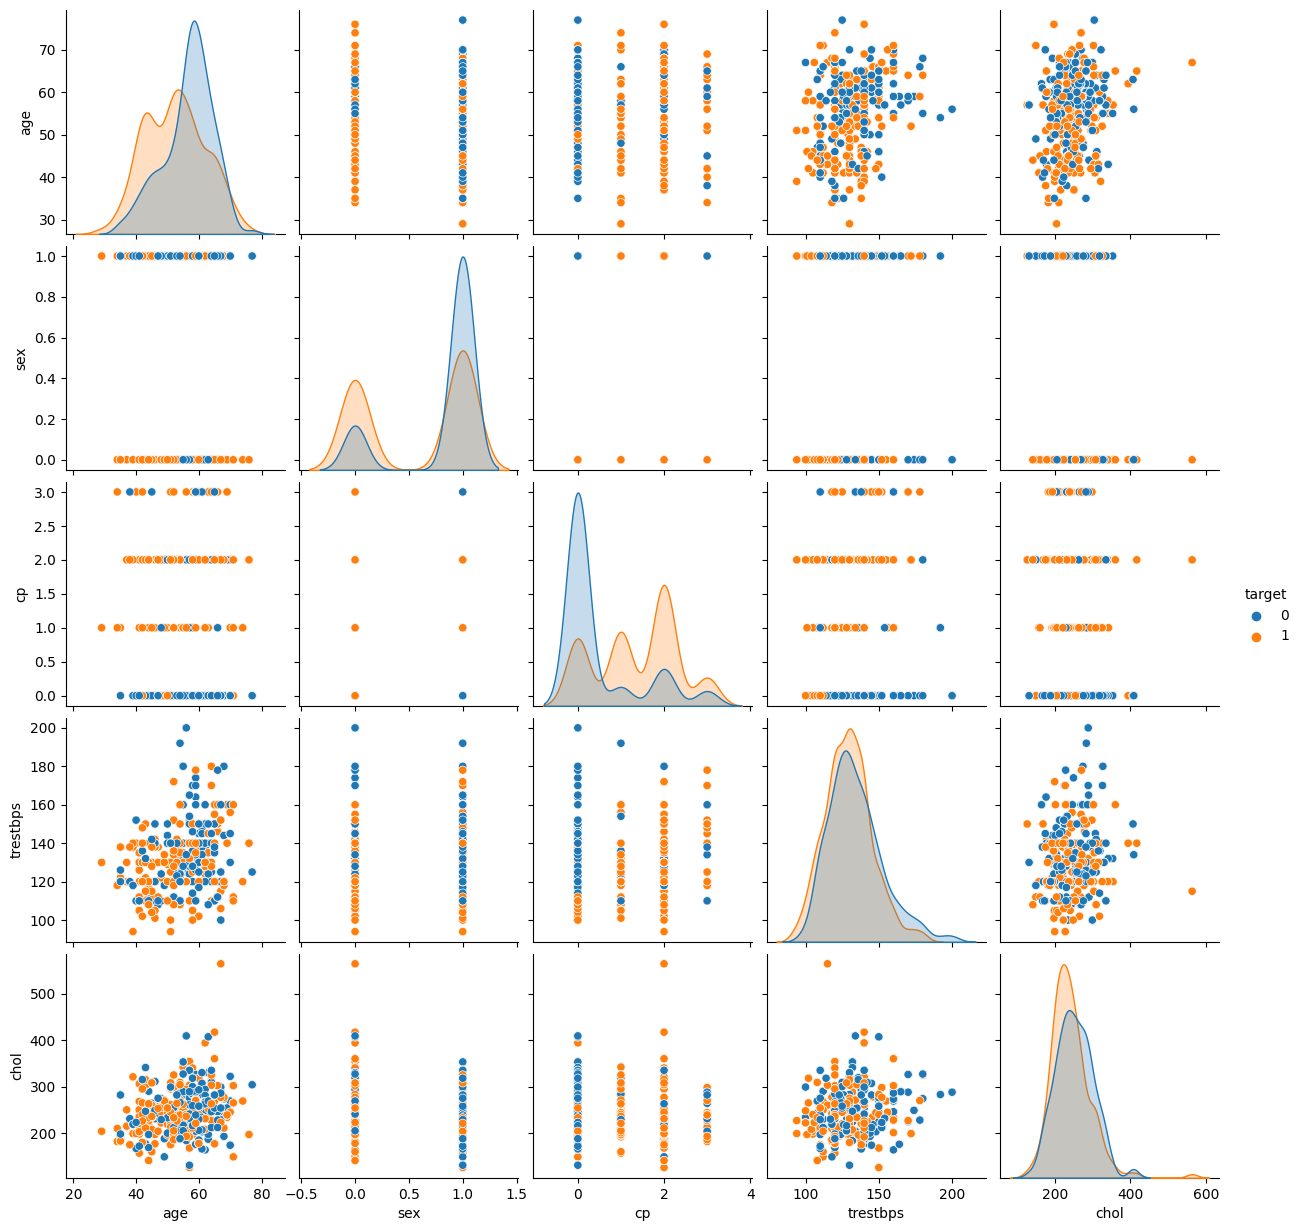

In [52]:
sns.pairplot(data, hue= 'target',vars = ['age', 'sex', 'cp', 'trestbps', 'chol' ])

# pair plot in dataset of outcome with all columns

<Axes: >

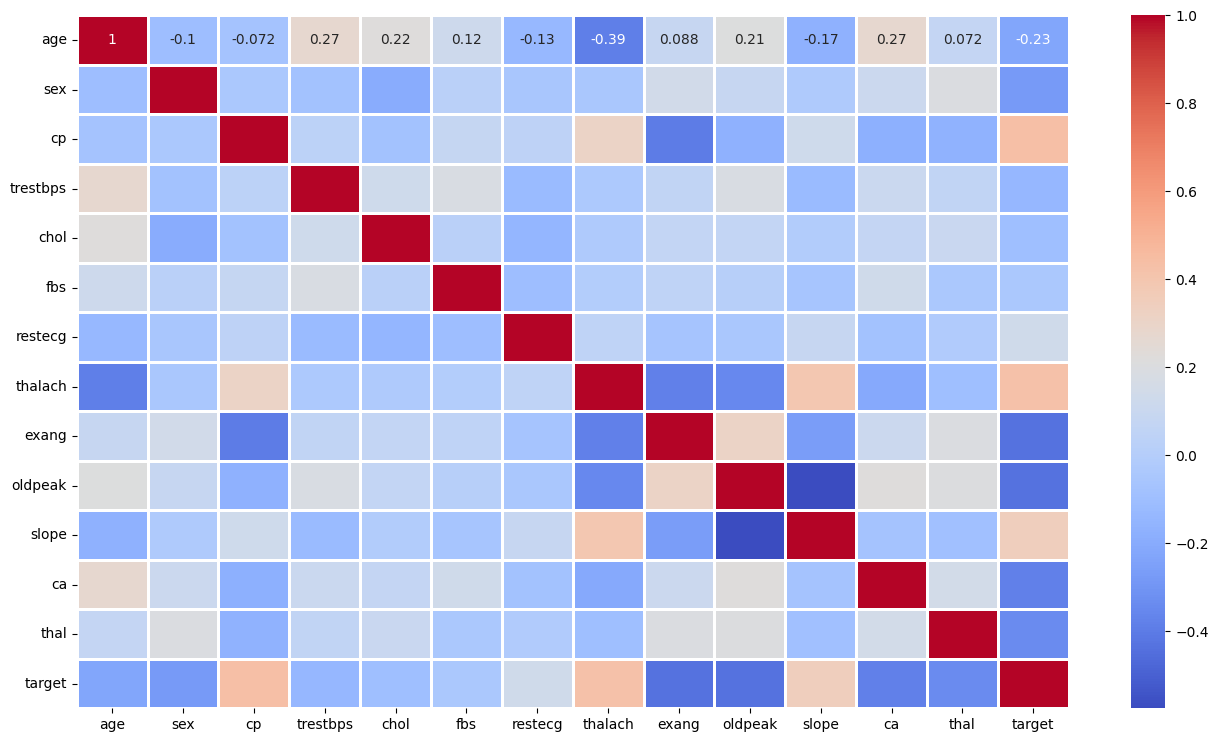

In [11]:
plt.figure(figsize= (16,9))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm', linewidths = 2)

here, we have approx equal distribution of data.

### Notation for Healthy and Defective Heart

- 1 Represents a Defective Heart
- 0 Represents a Healthy Heart


## Splitting the Features and Target

In [12]:
X = data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
Y = data['target']
Y.head()

# Y contains one column which includes output for validating the result after model prediction


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

#### Data Standardization

In [14]:
scaler = StandardScaler()

In [53]:
scaler.fit(X)
X_standard = scaler.transform(X)

## Splitting the Data into Training data and Test data

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 15 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness

In [17]:
# checking shape of splitted data

print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (871, 13) (154, 13)


## Model Training


### 1. Logistic Regression



In [58]:
# instantiate the model
lr = LogisticRegression()
# training the LogisticRegression model with training data
lr.fit(X_train, Y_train)

c:\Users\palla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8377


### 2. Naive Bayes Classifier

In [60]:
# instantiate the model
gnb = GaussianNB()
# model = gnb

# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [61]:
y_pred = gnb.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7792


### 3. K-Nearest Neighbor (KNN)

In [62]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)


# fit the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
y_pred = knn.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.7532


### 4. Decision Tree Classifier

In [64]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()


# fit the model
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [65]:
y_pred = dtc.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

# overfitted

Model accuracy score: 1.0000


### 5. Support Vector Machine (Linear)

In [66]:
# instantiate the model
svm = SVC(kernel='linear')

# fitting x samples and y classes
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [67]:
y_pred = svm.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.8312


## Multi-model training

In [28]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0) # A higher gamma value means that each training example will have a greater influence on the decision boundary.
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') # liblinear is parameter specifies the solver to use,
# L1 penalty is a type of regularization that helps to prevent overfitting.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)  # n_estimators : the number of trees in the forest,
# random_state : specifies the random seed that is used to initialize the random forest

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [29]:
classification = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier'  : knc,
    'Multinomial NB'  : mnb,
    'Decision Tree Classifier'  : dtc,
    'Logistic Regression'  : lrc,
    'Random Forest Classifier'  : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boosting Classifier' : gbdt,
    'XGB Classifier' : xgb
}

In [30]:
def train_classifier(classification, X_train, y_train, X_test, y_test):
  classification.fit(X_train, y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  return accuracy, precision, matrix

In [68]:
accuracy_scores = []
precision_scores = []

for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix = train_classifier(cls, X_train, Y_train, X_test, Y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusin-Matrix : ", matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

Model name :  Support Vector Classifier
Accuracy :  0.512987012987013
Precision :  0.512987012987013
Confusin-Matrix :  [[ 0 75]
 [ 0 79]] 

Model name :  K-Neighbors Classifier
Accuracy :  0.7662337662337663
Precision :  0.8307692307692308
Confusin-Matrix :  [[64 11]
 [25 54]] 

Model name :  Multinomial NB
Accuracy :  0.7142857142857143
Precision :  0.7215189873417721
Confusin-Matrix :  [[53 22]
 [22 57]] 

Model name :  Decision Tree Classifier
Accuracy :  0.8896103896103896
Precision :  0.918918918918919
Confusin-Matrix :  [[69  6]
 [11 68]] 

Model name :  Logistic Regression
Accuracy :  0.8376623376623377
Precision :  0.8375
Confusin-Matrix :  [[62 13]
 [12 67]] 

Model name :  Random Forest Classifier
Accuracy :  1.0
Precision :  1.0
Confusin-Matrix :  [[75  0]
 [ 0 79]] 

Model name :  AdaBoost Classifier
Accuracy :  0.8961038961038961
Precision :  0.9436619718309859
Confusin-Matrix :  [[71  4]
 [12 67]] 

Model name :  Bagging Classifier
Accuracy :  1.0
Precision :  1.0
Confus

C:\Users\palla\AppData\Local\Temp\ipykernel_12412\1132994605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(model_names, rotation=45, ha='right')
C:\Users\palla\AppData\Local\Temp\ipykernel_12412\1132994605.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(model_names, rotation=45, ha='right')


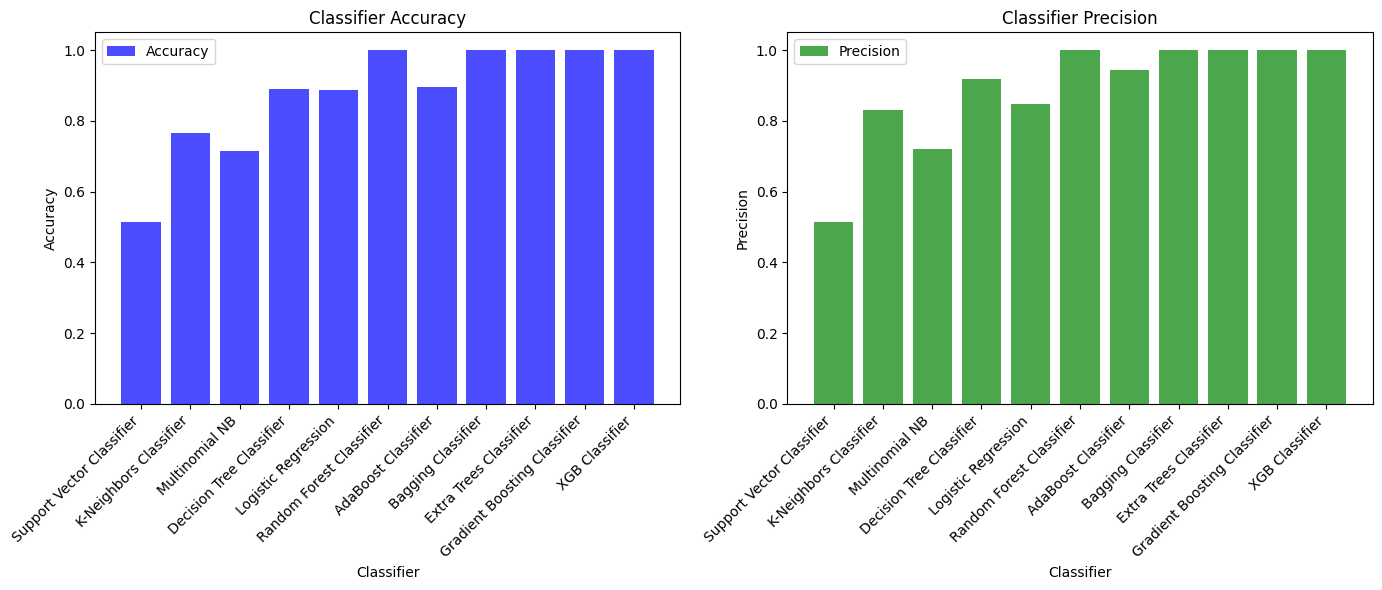

In [69]:
import matplotlib.pyplot as plt

# Define model names and scores
model_names = list(classification.keys())
accuracy_scores = [0.512987012987013, 0.7662337662337663, 0.7142857142857143, 0.8896103896103896, 0.887012987012987, 1.0, 0.8961038961038961, 1.0, 1.0, 1.0, 1.0]
precision_scores = [0.512987012987013, 0.8307692307692308, 0.7215189873417721, 0.918918918918919, 0.8467741935483871, 1.0, 0.9436619718309859, 1.0, 1.0, 1.0, 1.0]

# Create subplots for accuracy and precision
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for accuracy
ax1.bar(model_names, accuracy_scores, color='b', alpha=0.7, label='Accuracy')
ax1.set_xlabel('Classifier')
ax1.set_ylabel('Accuracy')
ax1.set_title('Classifier Accuracy')
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.legend()

# Bar plot for precision
ax2.bar(model_names, precision_scores, color='g', alpha=0.7, label='Precision')
ax2.set_xlabel('Classifier')
ax2.set_ylabel('Precision')
ax2.set_title('Classifier Precision')
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.legend()

plt.tight_layout()
plt.show()

In [33]:
result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [34]:
result_dataframe

,Algorithm,Accuracy,Precision
5,Random Forest Classifier,1.000000,1.000000
7,Bagging Classifier,1.000000,1.000000
8,Extra Trees Classifier,1.000000,1.000000
9,Gradient Boosting Classifier,1.000000,1.000000
10,XGB Classifier,1.000000,1.000000
6,AdaBoost Classifier,0.896104,0.943662
3,Decision Tree Classifier,0.889610,0.918919
4,Logistic Regression,0.887013,0.846774
1,K-Neighbors Classifier,0.766234,0.830769
2,Multinomial NB,0.714286,0.721519


## Model Improvement

In [35]:
# voting classifier :  ensemble learning method that combines the predictions of several different machine learning models to produce a final prediction.
# The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)


In [36]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('bc', bc), ('et', etc), ('xgb', xgb)],voting='soft')

In [70]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=No...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [71]:
y_pred = voting.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

# voting model is most accurate and precise

1.0
[[75  0]
 [ 0 79]]
1.0


## Model Evaluation

- Accuracy score
  - 1. For training data
  - 2. For testing data

  accuracy score for both should be closer to 1

- Other Metrices:
  - 1. Accuracy
  - 2. Precision
  - 3. Recall
  - 4. F1 Score

- Confusion Metrix
  

In [72]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = voting.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)

The accuracy of training data :  1.0


In [73]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = voting.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)

The accuracy of training data :  1.0


In [74]:
# Accuracy, F1, Recall, Precision

Y_pred = voting.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(Y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 1.0
Precision  : 1.0
Recall     : 1.0
F1-score   : 1.0


In [75]:
# check results
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



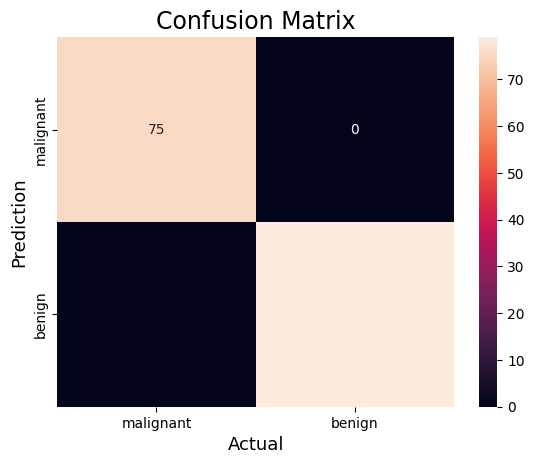

In [76]:
# confusion matrix

cm = confusion_matrix(Y_test,Y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Building Prediction system

#### Steps :

  - take input data
  - Process the data, change into array
  - reshape data as single element in array
  - predict output using predict function
  - output the value

In [44]:
# input feature values
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2)

# changing data to numpy array
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)

# standarize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data[0])


In [77]:
# predicting the result and printing it

prediction = voting.predict(input_data_reshaped)

print(prediction)

if(prediction[0] == 0):
    print("Patient has a healthy heart")

else:
    print("Patient has a cardiovascular Disease")

[1]
Patient has a cardiovascular Disease


c:\Users\palla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\palla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
c:\Users\palla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


### Notations
  - [0] : means patient has a healthy heart
  - [1] : means patient has a unhealthy heart
  

## Saving the model

In [46]:
import pickle
# importing the library

filename = "trained_model.pkl"
pickle.dump(voting, open(filename, 'wb'))
# saving file


In [47]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.pkl",'rb'))

In [48]:
# save the model to disk
filename = 'heart_model.sav'
joblib.dump(voting, filename)

['heart_model.sav']